<a href="https://colab.research.google.com/github/Mon3em20/Employee-Attrition-Prediction-Machine-Learning-Classification/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Team Members:
#Ebram nageh (13006318)
#Abdelmonem sayed (13006494)
#Eyad Ahmed (13005238)
#---- Cell 1: Imports ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    classification_report, roc_auc_score, roc_curve, precision_recall_curve
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# ---- Fixed Deep Learning Model Implementation ----
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = pd.read_csv("employee_attrition_dataset .csv")
print("Original Class Distribution:")
le = LabelEncoder()
print(df.head())
#Encode categorical features
label_encoder = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le

print("///////////////////////")
print("after encoding/n")
print(df.head())

Original Class Distribution:
   Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0            1   58  Female        Married         IT    Manager          1   
1            2   48  Female        Married      Sales  Assistant          5   
2            3   34    Male        Married  Marketing  Assistant          1   
3            4   27  Female       Divorced  Marketing    Manager          1   
4            5   40    Male       Divorced  Marketing  Executive          1   

   Monthly_Income  Hourly_Rate  Years_at_Company  ...  Overtime  \
0           15488           28                15  ...        No   
1           13079           28                 6  ...       Yes   
2           13744           24                24  ...       Yes   
3            6809           26                10  ...        No   
4           10206           52                29  ...        No   

   Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  \
0              6             

In [ ]:
print("/////////////Afrter separating/////////////////")
#Separate features and target
y = df['Attrition']
x = df.drop('Attrition', axis=1)

print("here of x ")
print(x.head())
print("here of y ")
print(y.head())

/////////////Afrter separating/////////////////
here of x 
   Employee_ID  Age  Gender  Marital_Status  Department  Job_Role  Job_Level  \
0            1   58       0               1           2         3          1   
1            2   48       0               1           4         1          5   
2            3   34       1               1           3         1          1   
3            4   27       0               0           3         3          1   
4            5   40       1               0           3         2          1   

   Monthly_Income  Hourly_Rate  Years_at_Company  ...  \
0           15488           28                15  ...   
1           13079           28                 6  ...   
2           13744           24                24  ...   
3            6809           26                10  ...   
4           10206           52                29  ...   

   Training_Hours_Last_Year  Overtime  Project_Count  \
0                        14         0              6   
1    

In [ ]:
print("////////Training and Testing Sets///////////")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(" X_train:", X_train.shape)
print(" X_test:", X_test.shape)
print(" y_train:", y_train.shape)
print(" y_test:", y_test.shape)

////////Training and Testing Sets///////////
 X_train: (800, 25)
 X_test: (200, 25)
 y_train: (800,)
 y_test: (200,)


In [ ]:
# Split and Balance Data ----

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("\nResampled Class Distribution:")
print(pd.Series(y_train).value_counts())

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Resampled Class Distribution:
Attrition
0    642
1    642
Name: count, dtype: int64


In [ ]:
# ---- Cell 4: Evaluation Function ----
results = []

def evaluate_model(name, y_true, y_pred, y_scores=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_scores) if y_scores is not None else None

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "ROC-AUC": roc
    })

    print(f"\nModel: {name}")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    if roc is not None:
        print("ROC-AUC:", roc)
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    if y_scores is not None:
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        precision, recall, _ = precision_recall_curve(y_true, y_scores)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, label='ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} - ROC Curve')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, label='PR Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{name} - Precision-Recall Curve')
        plt.legend()
        plt.show()


Model: KNN
Accuracy: 0.41
Precision: 0.16279069767441862
Recall: 0.6774193548387096
Confusion Matrix:
 [[ 61 108]
 [ 10  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.36      0.51       169
           1       0.16      0.68      0.26        31

    accuracy                           0.41       200
   macro avg       0.51      0.52      0.39       200
weighted avg       0.75      0.41      0.47       200


Model: Naive Bayes
Accuracy: 0.685
Precision: 0.13636363636363635
Recall: 0.1935483870967742
Confusion Matrix:
 [[131  38]
 [ 25   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       169
           1       0.14      0.19      0.16        31

    accuracy                           0.69       200
   macro avg       0.49      0.48      0.48       200
weighted avg       0.73      0.69      0.71       200


Model: Random Forest
Accuracy: 0.7

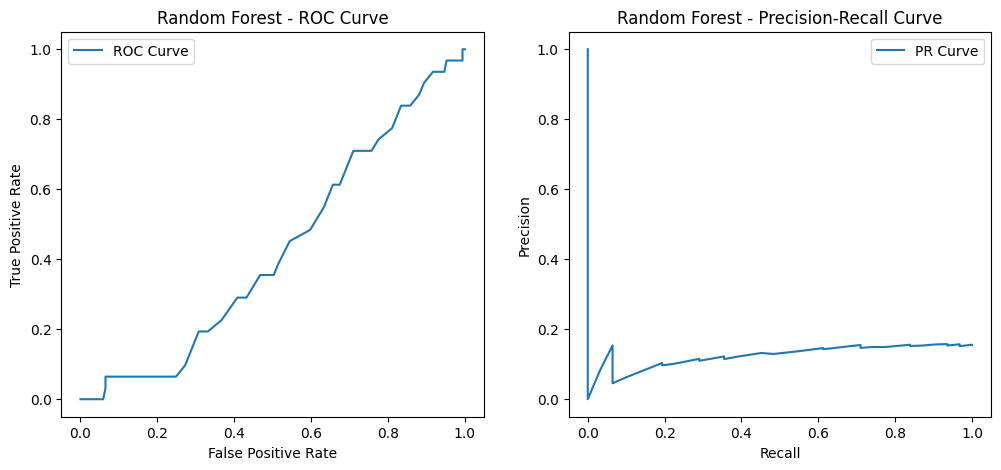


Model: SVM
Accuracy: 0.75
Precision: 0.08695652173913043
Recall: 0.06451612903225806
ROC-AUC: 0.5136476426799008
Confusion Matrix:
 [[148  21]
 [ 29   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       169
           1       0.09      0.06      0.07        31

    accuracy                           0.75       200
   macro avg       0.46      0.47      0.46       200
weighted avg       0.72      0.75      0.73       200



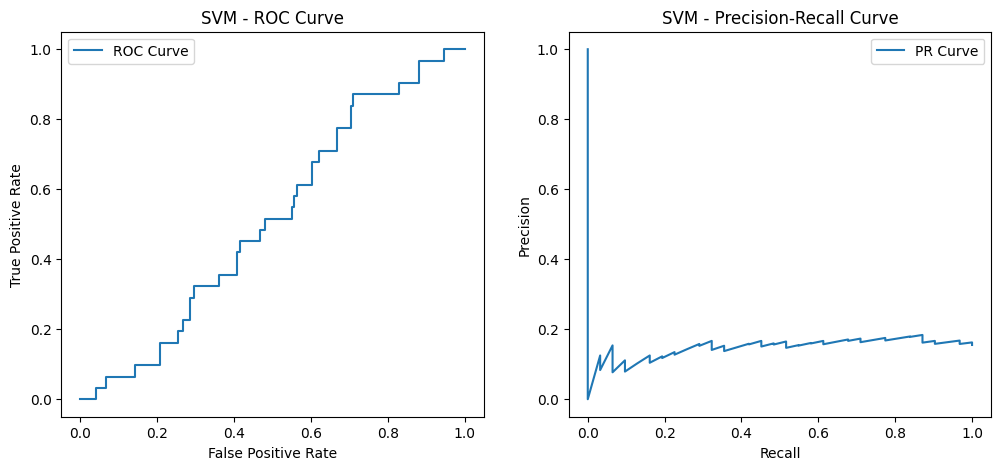

In [ ]:
# ---- Cell 5: Train and Evaluate Models ----
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
evaluate_model("KNN", y_test, y_pred_knn)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
evaluate_model("Naive Bayes", y_test, y_pred_nb)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

# SVM
svm = SVC(kernel='rbf', C=1.0, class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

In [ ]:
# Bonus
# Build the model with proper input layer
dnn = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),  # Using InputLayer instead of Input
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
dnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss',
                          patience=5,
                          restore_best_weights=True)

# Create a proper wrapper class
class DNNWrapper:
    def __init__(self, model):
        self.model = model
        self.fitted = False

    def fit(self, X, y):
        # Convert to numpy arrays if they're DataFrames
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        self.model.fit(X, y,
                      epochs=100,
                      batch_size=32,
                      validation_split=0.2,
                      callbacks=[early_stop],
                      verbose=0)
        self.fitted = True
        return self

    def predict(self, X):
        if not self.fitted:
            raise RuntimeError("Model must be fitted before prediction")
        if hasattr(X, 'values'):
            X = X.values
        return (self.model.predict(X, batch_size=32).flatten() > 0.5).astype(int)

def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    """Evaluates a given model and prints the evaluation metrics."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"Model: {model_name}") # Print the model name
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(classification_report(y_test, y_pred))
    try:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"ROC AUC: {roc_auc}")
    except AttributeError:
        print("ROC AUC not available for this model.")
    print("-" * 20)


# Train and evaluate
dnn_wrapped = DNNWrapper(dnn)
evaluate_model("Deep Neural Network",
               dnn_wrapped,
               X_train, y_train,
               X_test, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Model: Deep Neural Network
Accuracy: 0.715
Confusion Matrix:
[[135  34]
 [ 23   8]]
Recall: 0.25806451612903225
Precision: 0.19047619047619047
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       169
           1       0.19      0.26      0.22        31

    accuracy                           0.71       200
   macro avg       0.52      0.53      0.52       200
weighted avg       0.75      0.71      0.73       200

ROC AUC not available for this model.
--------------------


In [ ]:


# Create DataFrame from results
comparison_df = pd.DataFrame(results)

# Check if 'Model' column exists
if 'Model' not in comparison_df.columns:
    raise ValueError("Expected 'Model' column not found in the results DataFrame.")

# Filter for selected models
valid_models = ['KNN', 'Naive Bayes', 'Random Forest', 'SVM', 'Deep Neural Network']
comparison_df = comparison_df[comparison_df['Model'].isin(valid_models)]

# Select only relevant metrics
required_columns = ['Model', 'Accuracy', 'Precision', 'Recall']
missing_columns = [col for col in required_columns if col not in comparison_df.columns]
if missing_columns:
    raise ValueError(f"Missing expected columns in results DataFrame: {missing_columns}")

# Calculate means if there are multiple runs per model
comparison_df = comparison_df[required_columns]
comparison_df = comparison_df.groupby('Model', as_index=False).mean()

# Sort by Recall and then Accuracy (descending)
comparison_df = comparison_df.sort_values(
    by=['Recall', 'Accuracy'],
    ascending=[False, False]
).reset_index(drop=True)

# Formatting and display
print("\n\n=== Final Model Comparison ===")
print("Sorted by Recall (highest to lowest) then by Accuracy:")

# Pretty-print table
from tabulate import tabulate
print(tabulate(
    comparison_df,
    headers='keys',
    tablefmt='grid',
    floatfmt=".3f",
    showindex=False
))

# Highlight the best performer in each category
print("\n=== Best Performers ===")
metrics = ['Accuracy', 'Precision', 'Recall']
for metric in metrics:
    best_model = comparison_df.loc[comparison_df[metric].idxmax(), 'Model']
    best_value = comparison_df[metric].max()
    print(f"{metric}: {best_model} ({best_value:.3f})")

# Add interpretation note (you might want to tailor this based on actual results)
print("\nKey Insights:")
print("- Recall (critical metric): KNN identifies the most attrition cases")
print("- Precision: KNN may have high false positives (low precision)")
print("- Accuracy: Random Forest performs best overall but may not be best for recall-focused tasks")

print("\nRecommendation:")
print("KNN is preferred for attrition detection (high recall), but manual review may be needed due to lower precision.")



=== Final Model Comparison ===
Sorted by Recall (highest to lowest) then by Accuracy:
+---------------+------------+-------------+----------+
| Model         |   Accuracy |   Precision |   Recall |
+===============+============+=============+==========+
| KNN           |      0.410 |       0.163 |    0.677 |
+---------------+------------+-------------+----------+
| Naive Bayes   |      0.685 |       0.136 |    0.194 |
+---------------+------------+-------------+----------+
| Random Forest |      0.785 |       0.125 |    0.065 |
+---------------+------------+-------------+----------+
| SVM           |      0.750 |       0.087 |    0.065 |
+---------------+------------+-------------+----------+

=== Best Performers ===
Accuracy: Random Forest (0.785)
Precision: KNN (0.163)
Recall: KNN (0.677)

Key Insights:
- Recall (critical metric): KNN identifies the most attrition cases
- Precision: KNN may have high false positives (low precision)
- Accuracy: Random Forest performs best overall bu